# Section-2
#  Perceptron vs Neural Networks

## Name-Komal , Student-id -33275440

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier


# Part1
### Load Task2B train.csv and Task2B test.csv datasets, plot the training and testing data separately in two plots. Mark the data with different labels in different colors.

In [2]:
train_data = pd.read_csv('Task2B_train.csv')
train_data.head()

,feature1,feature2,label
0,1.517571,0.424917,1
1,0.304268,0.999691,0
2,0.485924,-0.222913,1
3,-0.933579,-0.093579,0
4,0.684210,-0.436912,1


In [3]:
test_data = pd.read_csv('Task2B_test.csv')
test_data.head()

,feature1,feature2,label
0,1.647039,0.308835,1
1,0.351039,0.965041,0
2,0.490616,-0.270617,1
3,-0.941262,0.034721,0
4,0.584584,-0.387536,1


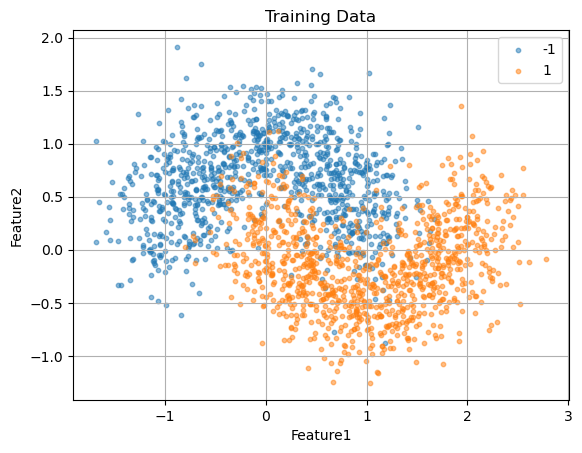

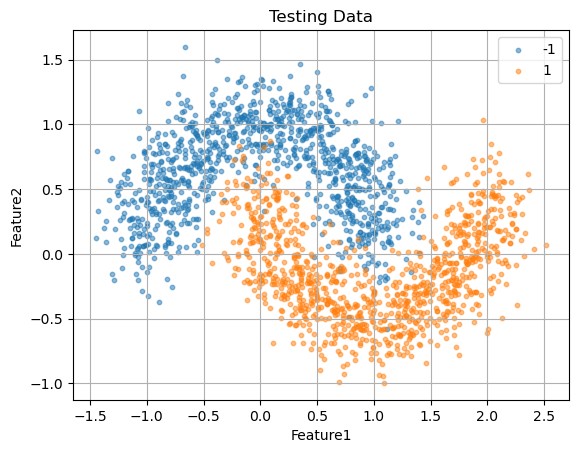

In [4]:
# Convert labels from [0, 1] to [-1, 1]
train_data['label'] = train_data['label'].apply(lambda x: -1 if x == 0 else 1)
test_data['label'] = test_data['label'].apply(lambda x: -1 if x == 0 else 1)

X_train = train_data[['feature1', 'feature2']].values
y_train = train_data['label'].values
X_test = test_data[['feature1', 'feature2']].values
y_test = test_data['label'].values

# Function to plot data
def plot_data(data, title):
    groups = data.groupby('label')
    fig, ax = plt.subplots()
    for name, group in groups:
        ax.scatter(group.feature1, group.feature2, alpha=0.5, s=10, label=name)
    ax.legend()
    plt.title(title)
    plt.xlabel('Feature1')
    plt.ylabel('Feature2')
    plt.grid(True)
    plt.show()

# Plot training data
plot_data(train_data, 'Training Data')

# Plot testing data
plot_data(test_data, 'Testing Data')


# Part-2



In [5]:
class CustomPerceptron:
    def __init__(self, learning_rate=0.01, max_iterations=1000, seed=132):
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.seed = seed
        self.weights = None

    def train(self, features, labels):
        rng = np.random.default_rng(self.seed)
        n_samples, n_features = features.shape
        # Initialize weights for features and one extra for the bias
        self.weights = rng.normal(size=n_features + 1)

        # Include bias in features
        features = np.hstack([features, np.ones((n_samples, 1))])
        
        for _ in range(self.max_iterations):
            for i in range(n_samples):
                prediction = np.sign(np.dot(features[i], self.weights))
                if prediction != labels[i]:
                    self.weights += self.learning_rate * labels[i] * features[i]

    def predict(self, features):
        # Include bias in features
        n_samples = features.shape[0]
        features = np.hstack([features, np.ones((n_samples, 1))])
        return np.where(np.dot(features, self.weights) >= 0, 1, -1)


### Training Perceptron models on the loaded training data

In [6]:
X_train = train_data[['feature1', 'feature2']].values
y_train = train_data['label'].values

perceptron1 = CustomPerceptron(learning_rate=0.1)
perceptron2 = CustomPerceptron(learning_rate=1.0)
perceptron1.train(X_train, y_train)
perceptron2.train(X_train, y_train)

### Calculate the test errors of two models and find the best η 

In [7]:
# Function to calculate error rate
def calculate_error_rate(predictions, labels):
    return np.mean(predictions != labels)

# Predicting test data using both Perceptrons
predictions1 = perceptron1.predict(X_test)
predictions2 = perceptron2.predict(X_test)

# Calculate error rates
error_rate1 = calculate_error_rate(predictions1, y_test)
error_rate2 = calculate_error_rate(predictions2, y_test)


# Display the error rates to determine the best model
print(f"Error rate with η = 0.1: {error_rate1:.2f}")
print(f"Error rate with η = 1.0: {error_rate2:.2f}")
best_eta = 0.1 if error_rate1 < error_rate2 else 1.0
best_error_rate = min(error_rate1, error_rate2)
print(f"The best learning rate is η = {best_eta} with an error rate of {best_error_rate:.2f}")


Error rate with η = 0.1: 0.13
Error rate with η = 1.0: 0.24
The best learning rate is η = 0.1 with an error rate of 0.13


### Plotting  decision boundary and the test data in one plot

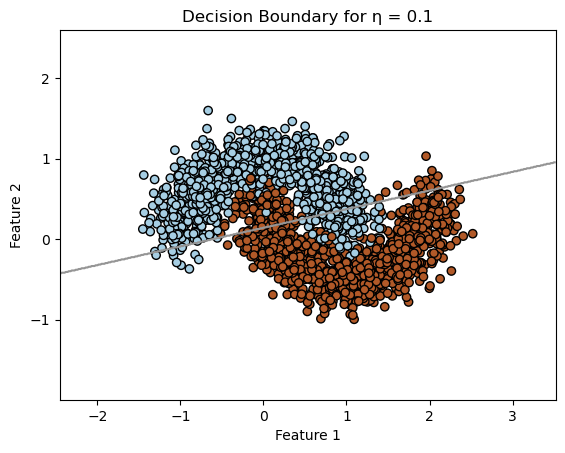

In [8]:
def plot_decision_boundary(perceptron, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
    Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # ADDING 'levels=[0]' to specify where the boundary lies
    plt.contour(xx, yy, Z, levels=[0], cmap="Greys", vmin=-1, vmax=1)  
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()


best_perceptron = perceptron1 if best_eta == 0.1 else perceptron2
plot_decision_boundary(best_perceptron, X_test, y_test, f"Decision Boundary for η = {best_eta}")

# Part-3

### Setting 3-layer Neural Network for each combination of K from 5-40 with a stepsize of 5 and learning rate in [0.01, 0.001] and calculating error using zero_one_loss

In [9]:
results = []
for k in range(5, 41, 5):
    for eta in [0.01, 0.001]:
        mlp = MLPClassifier(hidden_layer_sizes=(k,), learning_rate_init=eta, max_iter=1500, random_state=30)
        mlp.fit(X_train, y_train)
        predictions = mlp.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)  # calculating accuracy
        error = 1 - accuracy  #tracking error
        results.append({'K': k, 'eta': eta, 'accuracy': accuracy, 'error': error})
        print(f"K: {k}, eta: {eta}, Testing Accuracy: {accuracy:.3f}, Testing Error: {error:.3f}")

# Convert results to a structured DataFrame
results_df = pd.DataFrame(results)
print(results_df)


K: 5, eta: 0.01, Testing Accuracy: 0.881, Testing Error: 0.119
K: 5, eta: 0.001, Testing Accuracy: 0.868, Testing Error: 0.132
K: 10, eta: 0.01, Testing Accuracy: 0.967, Testing Error: 0.033
K: 10, eta: 0.001, Testing Accuracy: 0.881, Testing Error: 0.119
K: 15, eta: 0.01, Testing Accuracy: 0.968, Testing Error: 0.032
K: 15, eta: 0.001, Testing Accuracy: 0.964, Testing Error: 0.036
K: 20, eta: 0.01, Testing Accuracy: 0.962, Testing Error: 0.038
K: 20, eta: 0.001, Testing Accuracy: 0.962, Testing Error: 0.038
K: 25, eta: 0.01, Testing Accuracy: 0.968, Testing Error: 0.032
K: 25, eta: 0.001, Testing Accuracy: 0.959, Testing Error: 0.041
K: 30, eta: 0.01, Testing Accuracy: 0.966, Testing Error: 0.034
K: 30, eta: 0.001, Testing Accuracy: 0.960, Testing Error: 0.040
K: 35, eta: 0.01, Testing Accuracy: 0.968, Testing Error: 0.032
K: 35, eta: 0.001, Testing Accuracy: 0.962, Testing Error: 0.038
K: 40, eta: 0.01, Testing Accuracy: 0.967, Testing Error: 0.033
K: 40, eta: 0.001, Testing Accuracy

### Plotting the effect of different K values on the accuracy of the testing data.

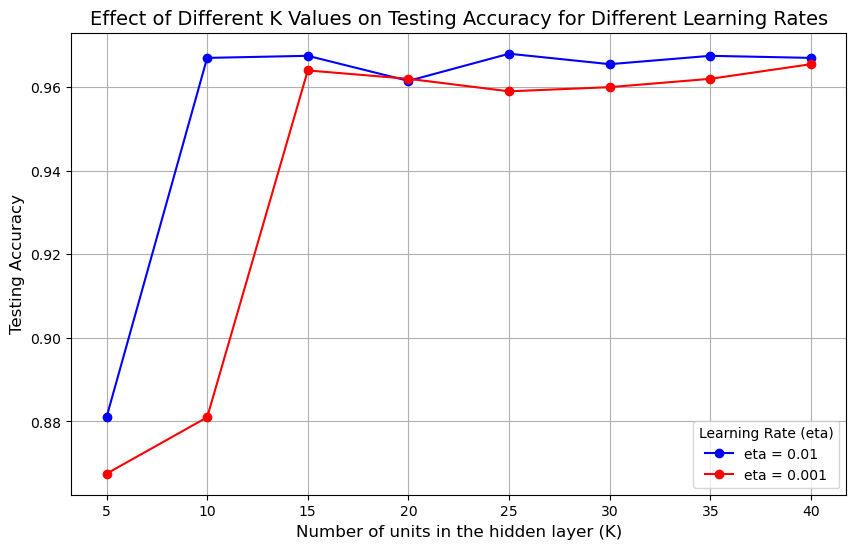

In [10]:
plt.figure(figsize=(10, 6))

# Plot for eta = 0.01
eta_0_01 = results_df[results_df['eta'] == 0.01]
plt.plot(eta_0_01['K'], 1 - eta_0_01['error'], marker='o', label='eta = 0.01', linestyle='-', color='blue')  # converting error to accuracy

# Plot for eta = 0.001
eta_0_001 = results_df[results_df['eta'] == 0.001]
plt.plot(eta_0_001['K'], 1 - eta_0_001['error'], marker='o', label='eta = 0.001', linestyle='-', color='red')  # converting error to accuracy

plt.xlabel('Number of units in the hidden layer (K)', fontsize=12)
plt.ylabel('Testing Accuracy', fontsize=12)  # changed from 'Testing Error' to 'Testing Accuracy'
plt.title('Effect of Different K Values on Testing Accuracy for Different Learning Rates', fontsize=14)
plt.legend(title='Learning Rate (eta)', fontsize=10)
plt.grid(True)
plt.show()


### Best combination of K based on above plot

In [11]:
# Finding the best model based on accuracy
best_model = max(results, key=lambda x: x['accuracy'])
print(f"Best Model found at K={best_model['K']}, η={best_model['eta']} with Accuracy: {best_model['accuracy']:.3f}")


Best Model found at K=25, η=0.01 with Accuracy: 0.968


In [12]:
#following from above we result
best_K = 25
best_eta = 0.01

# Initializing the MLPClassifier with the best parameters
best_model = MLPClassifier(hidden_layer_sizes=(best_K,), learning_rate_init=best_eta, max_iter=1500, random_state=30)

# Fit the model on the training data
best_model.fit(X_train, y_train)

# Predict on the testing data
best_predictions = best_model.predict(X_test)

# Calculate the accuracy and the testing error
best_accuracy = accuracy_score(y_test, best_predictions)
best_error = 1 - best_accuracy  # Consistent with accuracy calculation

# Print the testing accuracy and error
print(f"Testing Accuracy for best model (K={best_K}, eta={best_eta}): {best_accuracy:.3f}")
print(f"Testing Error for best model (K={best_K}, eta={best_eta}): {best_error:.3f}")

Testing Accuracy for best model (K=25, eta=0.01): 0.968
Testing Error for best model (K=25, eta=0.01): 0.032


### plot the decision boundary and the test data in one plot.¶

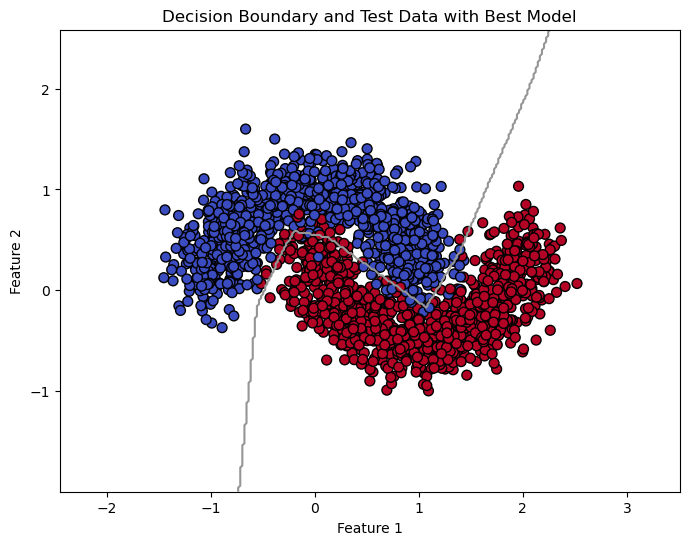

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(X, y, model, title):
    # Set the boundaries of the plot
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.02  # step size in the mesh

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the function value for the whole grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.figure(figsize=(8, 6))
    plt.contour(xx, yy, Z, levels=[0.5], cmap="Greys", vmin=0, vmax=1)  # Using level at 0.5 to draw the boundary
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', s=50)  # Vivid colors for the points

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Decision Boundary with Test Data
plot_decision_boundary( X_test, y_test,best_model, "Decision Boundary and Test Data with Best Model")

# Part-4
###  Difference between Perceptron and a 3-layer Neural Network


### * As from the above plots we can see that Perceptron decision boundary shows a straight line that attempts to separate the two classes but fails to capture the complex,distribution of the data. This results in many misclassified points.
### * In contrast, the decision boundary generated by the 3-layer Neural Network is curved and closely follows the contours of the data, effectively separating the blue and red clusters. The neural network's boundary adapts to the non-linear patterns in the dataset, resulting in a much more accurate classification.

# Reasons

### *Perceptron Model-It provides a diagonal line which is not able to seprate the labels in the data as perceptron is a single-layer neural network with no hidden layers. It uses a linear activation function, which inherently limits it to linear decision boundaries.So we can say this will perform well when classes are linearly separable. However, when dealing with complex patterns or non-linear data distributions like above it is not able to accurately classify instances.

### *3-layer Neural Network- As we can see that 3-layer neuralnetwork is performing way better than perceptron in separating classes. The reason because Unlike the Perceptron, a neural network with multiple layers and non-linear activation functions can learn non-linear decision boundaries.it has hidden layers which contains nonlinear activation functions.The neural network has ability to  fit complex shapes in the data in decision boundaries, unlike the Perceptron which is constrained to linear separation.

### *Thus, the difference in the decision boundaries of these models is primarily due to the Perceptron’s linear limitation versus the neural network’s capacity for learning non-linear mappings.